# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# My Cell

mouse_df.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [5]:
# Renaming comuns for ease of coding

mouse_df = mouse_df.rename(columns={'Mouse ID': 'ID', 'Drug Regimen': 'Drug', 'Weight (g)': 'Wt',
                           'Timepoint': 'time', 'Tumor Volume (mm3)': 'tvolume', 'Metastatic Sites': 'sites'})
mouse_df.columns


Index(['ID', 'Drug', 'Sex', 'Age_months', 'Wt', 'time', 'tvolume', 'sites'], dtype='object')

In [6]:
# My cell
mouse_df.describe()


,Age_months,Wt,time,tvolume,sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [7]:
# My Cell
mouse_df['Drug'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

### Number of Mice in Study
 In this study, there were **249** mice that were given various drug regimens.

In [8]:
# Checking the number of mice.
mouse_df['ID'].nunique()


249

Data was examined for duplicate data points.

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_df[mouse_df.duplicated(subset=['ID', 'time'])]
duplicates['ID'].unique()


array(['g989'], dtype=object)

### Duplicate Data

While preparing the data for analysis, it was found that there were duplicate contradictory data points for a single mouse. This mouse, with ID g989, will be dropped from the data set. For transpancy, the data for this mouse is shown in the table below.

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_g989 = mouse_df.loc[mouse_df['ID'] == 'g989']
duplicate_g989


,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# mouse_df_clean = mouse_df.drop_duplicates(subset=['ID', 'time'])
# mouse_df_clean.head()

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_clean = mouse_df.loc[mouse_df['ID'] != 'g989']
mouse_df_clean.head()

,ID,Drug,Sex,Age_months,Wt,time,tvolume,sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Data Cleaning
Duplicate data was removed and a clean data frame produced.

In [13]:
# Checking the number of mice in the clean DataFrame.
mouse_df_clean.to_csv('mouse_clean.csv')
mouse_df_clean['ID'].nunique()

248

## Summary Statistics
Below is a table summarizing the data for the ten different drug regimens examined in this study. The table provides the mean, median, variance, standard deviation and SEM for tumor volume measured in cubic millimeters (mm3)..

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
reg_mean = mouse_df_clean.groupby('Drug').mean()['tvolume']
reg_med = mouse_df_clean.groupby('Drug').median()['tvolume']
reg_var = mouse_df_clean.groupby('Drug').var()['tvolume']
reg_std = mouse_df_clean.groupby('Drug').std()['tvolume']
reg_sem = mouse_df_clean.groupby('Drug').sem()['tvolume']
reg_med.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({'Tumor Volume Mean':reg_mean,
                              'Tumor Volume Median':reg_med,
                              'Tumor Volume Variance':reg_var,
                              'Tumor Volume Std. Dev.': reg_std,
                              'Tumor Volume Std. Err.': reg_sem
})
summary_stats


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen

mouse_df_clean.groupby(['Drug'])[['tvolume']].agg(["mean", "median", "var", "std", "sem"])

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_agg = pd.DataFrame(mouse_df_clean.groupby(['Drug'])[['tvolume']].agg(["mean", "median", "var", "std", "sem"]))
summary_stats_agg

tvolume                                          
                mean     median        var       std       sem
Drug                                                          
Capomulin  40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin   52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol  52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril   55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol   54.331565  52.509285  66.173479  8.134708  0.596466
Placebo    54.033581  52.288934  61.168083  7.821003  0.581331
Propriva   52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane   40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn   54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol  53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts
The following charts serve to summarize information about how many data points were created for each drug studied, and some basic demographic infrmation about the mouse population studied.

The first bar chart shows the total number of timepoints measured for each drug (This chart was produced using Pandas). The data was sorted for ease of comparison.

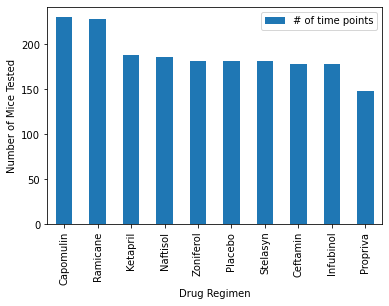

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_num = mouse_df_clean.groupby(['Drug'])
# timepoint_num.head()
stat_labels = pd.DataFrame(timepoint_num['time'].count())
stat_labels.reset_index()
stat_labels_sort = stat_labels.sort_values(by='time', ascending=False)
stat_labels_sort
# drug_labels['Drug'] = timepoint_num[['Drug']]
# drug_labels.head(20)
stat_labels.to_csv('labels_check.csv')
drug_list = list(stat_labels_sort.index.values)
stat_labels_sort.plot(kind='bar', figsize=(6,4))
plt.legend(['# of time points'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()


The following chart is identical to the previous one, but was produced using Matplotlib.

<function matplotlib.pyplot.show(close=None, block=None)>

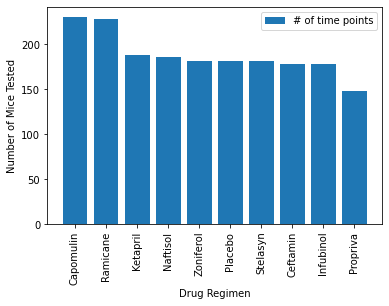

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x=stat_labels_sort.index, height=stat_labels_sort['time'], 
                                                align='center')
plt.xticks(rotation=90)
plt.legend(['# of time points'])
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show

The pie chart below represents the distribution of the mice studied by sex. Chart produced using Pandas.

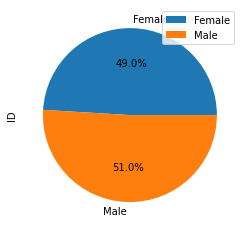

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = mouse_df_clean.groupby(['Sex'])['ID']
gender.nunique()
gender = pd.DataFrame(round(gender.count(),2))
gender.plot(kind='pie', subplots=True, autopct="%1.1f%%")
plt.show()



The same pie chart as above. This one produced using Matplotlib.

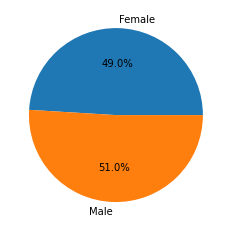

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender.index
sizes = gender['ID']
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
big_tumor = mouse_df_clean.nlargest(mouse_df_clean['ID'].nunique(),['time'])

big_tumor.to_csv('drug_count.csv')
big_tumor['Drug'].value_counts().sum()
# big_tumor.dtypes
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


248

In [21]:
# My Code

Infubinol = big_tumor.loc[big_tumor["Drug"] == 'Infubinol', 'tvolume']
Capomulin = big_tumor.loc[big_tumor["Drug"] == 'Capomulin', 'tvolume']
Ramicane = big_tumor.loc[big_tumor["Drug"] == 'Ramicane', 'tvolume']
Ceftamin = big_tumor.loc[big_tumor["Drug"] == 'Ceftamin', 'tvolume']

Ramicane.sort_values()
# plt.boxplot(Ceftamin)

# # fig1, ax1 = plt.subplots()
# # ax1.boxplot(new_calc)
# plt.show()


9      22.050126
8      24.365505
49     29.128472
59     30.276232
74     30.564625
84     30.638696
93     31.001861
114    31.095335
48     31.369406
94     31.560470
58     32.798171
153    32.833189
174    32.978522
154    33.397653
184    33.562402
83     34.022093
113    34.954733
73     35.114575
193    35.501190
183    35.557933
173    35.779451
194    36.134852
254    36.374510
233    36.520033
234    37.225650
272    37.311236
213    38.259725
271    38.265404
327    38.407618
214    38.810366
326    40.258818
253    40.442370
400    40.659006
410    40.667713
429    42.504926
430    43.047543
409    43.453687
399    44.006724
419    44.471821
420    45.220869
Name: tvolume, dtype: float64

### Comparison of drug regimens
The following output seeks to evaluate outliers in the data for four of the ten drug regimens. The drugs chose for this evaluation were Capomulin, Ramicane, Infubinol, and Ceftamin.

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = big_tumor.loc[big_tumor["Drug"] == drug, 'tvolume']
    # tumor_volume.dtype
    # add subset 
    tumor_list.append(tumor_volume)
    
# Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"Outliers for {drug} : {outliers}")


Outliers for Capomulin : Series([], Name: tvolume, dtype: float64)
Outliers for Ramicane : 9    22.050126
Name: tvolume, dtype: float64
Outliers for Infubinol : Series([], Name: tvolume, dtype: float64)
Outliers for Ceftamin : Series([], Name: tvolume, dtype: float64)


The box chart below demonstrates the range of data for the four drugs across quartiles, and highlights any outliers. 

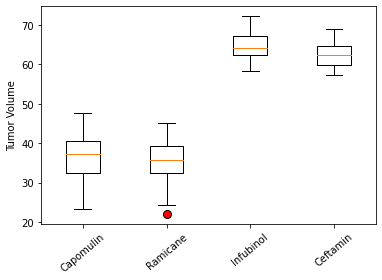

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_dict = dict(markerfacecolor='red',markersize=8)
plt.boxplot(tumor_list, labels = treatments, flierprops=boxplot_dict,widths=(.4))
plt.xticks(rotation = 40)
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

### Tumor volume vs. time point for Capomulin regimen
The line chart below takes a random mouse from the study that was under the Capomulin regimen and plots the tumor size measured in cubic millimeters over each of the time point measurements. Each time this cell is run, a new mouse will be randomly generated for the chart so that the results for many mice can be examined.

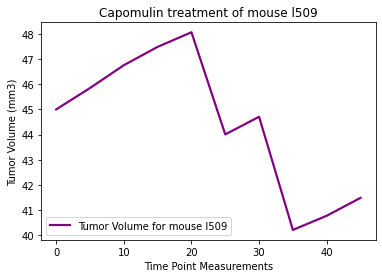

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = mouse_df_clean.loc[mouse_df_clean['Drug'] == 'Capomulin']
rand_mouse = capomulin_df.sample(n = 1)['ID']
rand_id = rand_mouse.iloc[0]
one_mouse = mouse_df_clean.loc[mouse_df_clean['ID'] == rand_id][['time', 'tvolume']]
one_mouse = one_mouse.set_index(['time'])
plt.plot(one_mouse, color='purple', label='Tumor Volume per Timepoint', linewidth=2.2)
plt.legend([f'Tumor Volume for mouse {rand_id}'], loc='best')
plt.title(f'Capomulin treatment of mouse {rand_id}')
plt.xlabel(f'Time Point Measurements')
plt.ylabel(f'Tumor Volume (mm3)')
plt.show()

### Average tumor volume vs. mouse weight for the Capomulin regimen
The scatter chart below shows the average tumor volume for each mouse on the Capomulin regimen by the weight of the mice. It is evident from the chart below that larger mice have larger tumors.

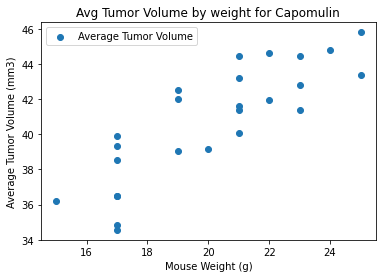

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_wt_capomulin = mouse_df_clean.loc[mouse_df_clean['Drug'] == 'Capomulin']
avg_tumor_capomulin = mouse_wt_capomulin.groupby(['ID']).mean()
plt.scatter(avg_tumor_capomulin['Wt'], avg_tumor_capomulin['tvolume'])
plt.title('Avg Tumor Volume by weight for Capomulin')
plt.legend(['Average Tumor Volume'], loc='upper left')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression
A linear regression was run on the data above. The r value of 0.84 shows a very strong positive correlation in the data.

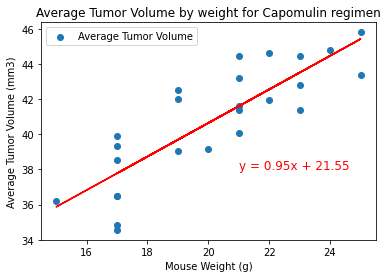

The correlation between mouse weight and the average tumor volume is 0.84


In [26]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

slope, inter, rvalue, pvalue, stderr = st.linregress(avg_tumor_capomulin['Wt'], avg_tumor_capomulin['tvolume'])
regress_values = avg_tumor_capomulin['Wt'] * slope + inter
line_eq = f'y = {str(round(slope,2))}x + {str(round(inter,2))}'
plt.scatter(avg_tumor_capomulin['Wt'], avg_tumor_capomulin['tvolume'])
plt.plot(avg_tumor_capomulin['Wt'],regress_values,"r-")
plt.annotate(line_eq, (21, 38), fontsize=12, color="red")
plt.title('Average Tumor Volume by weight for Capomulin regimen')
plt.legend(['Average Tumor Volume'], loc='upper left')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')
